### Compute compressibility of vdw gas

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
R = 0.08206
Pc = 72.9
Tc = 304.2

a = 27 * R**2 * Tc**2 / (Pc * 64)
b = R * Tc / (8 * Pc)

Tr = 1.1

def objective(V, Pr):
    
    P = Pr * Pc
    T = Tr * Tc
    return P * (V - b) - (R * T)  +  a / V**2 * (V - b)

### Approach 1: fsolve

- So, we simply solve for V at a given Pr
, and then compute Z
. There is a subtle trick needed to make this easy to solve, and that is to multiply each side of the equation by (V−b)
 to avoid a singularity when V=b


(0.0, 2.0)

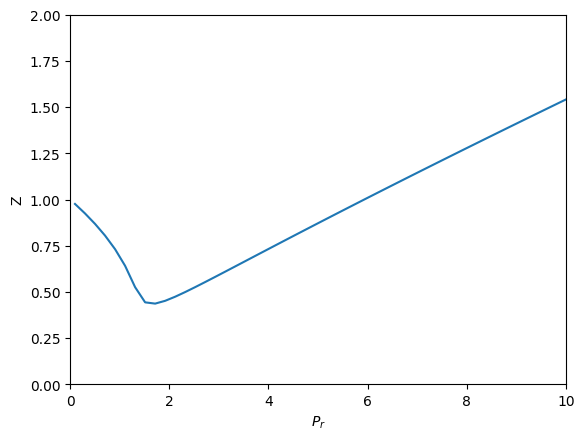

In [9]:
from scipy.optimize import fsolve

Pr_range = np.linspace(0.1, 10)
V = [fsolve(objective, 3, args=(Pr,))[0] for Pr in Pr_range]

T = Tr * Tc
P_range = Pr_range * Pc
Z = P_range * V / (R * T)

plt.plot(Pr_range, Z)
plt.xlabel('$P_r$')
plt.ylabel('Z')
plt.xlim([0, 10])
plt.ylim([0, 2])

### Approach 2: solve_ivp

(0.0, 2.0)

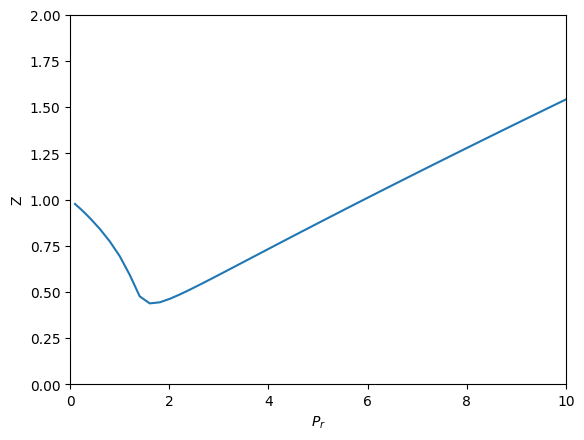

In [6]:
from scipy.integrate import solve_ivp

def dPdV(V):
    return -R * T / (V - b)**2 + 2 * a / V**3

def dVdP(V):
    return 1 / dPdV(V)

dPdPr = Pc

def dVdPr(Pr, V):
    return dVdP(V) * dPdPr

Pr_span = (0.1, 10)
Pr_eval, h = np.linspace(*Pr_span, retstep=True)

V0, = fsolve(objective, 3, args=(0.1,))

sol = solve_ivp(dVdPr, Pr_span, (V0,), dense_output=True, max_step=h)

V = sol.y[0]
P = sol.t * Pc
Z = P * V / (R * T)
plt.plot(sol.t, Z)
plt.xlabel('$P_r$')
plt.ylabel('Z')
plt.xlim([0, 10])
plt.ylim([0, 2])

### Approach 3: autograd

(0.0, 2.0)

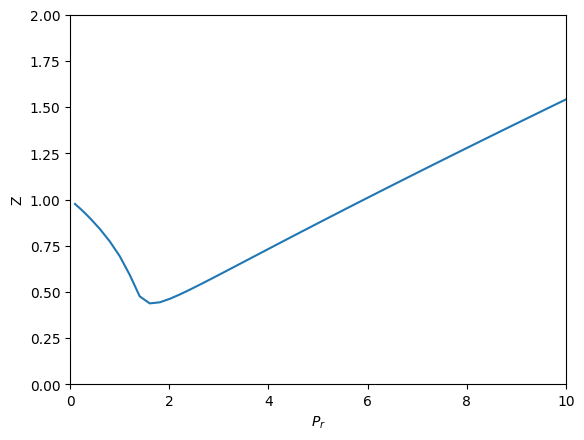

In [7]:
#pip install autograd
from autograd import grad

def P(V):
    return R * T / (V - b) - a / V**2

# autograd.grad returns a callable that acts like a function
dPdV = grad(P, 0) 

def dVdPr(Pr, V):
    return 1 / dPdV(V) * Pc

sol = solve_ivp(dVdPr,  Pr_span, (V0,), dense_output=True, max_step=h)

V, = sol.y
P = sol.t * Pc
Z = P * V / (R * T)
plt.plot(sol.t, Z)
plt.xlabel('$P_r$')
plt.ylabel('Z')
plt.xlim([0, 10])
plt.ylim([0, 2])